In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ładowanie danych

In [2]:
# ładowanie danych
df = pd.read_csv('przykładowe_dane.csv', sep=';')
df.dropna(axis=1, inplace=True)
df

,nazwa,kup/sprz,data,godzina,liczba akcji,kurs,oplata
0,Adobe,K,01.01.1999,15:31:43,20,"26,51$","1,75$"
1,Makita,K,02.02.1999,15:35:37,120,"2,89$","1,75$"
2,21 st Century Fox,K,02.02.1999,15:35:59,5,"125,30$","1,75$"
3,Starbucks,K,04.04.1999,15:47:20,30,"42,20$","1,75$"
4,Makita,S,05.06.1999,19:34:17,100,"13,46$","1,75$"
5,Facebook,K,06.07.1999,21:13:42,2,350$,"1,75$"
6,Adobe,K,06.07.1999,21:56:36,10,"21,13$","1,75$"
7,BlackBerry,K,06.11.1999,21:59:12,10,"5,20$","1,75$"
8,BlackBerry,S,06.11.1999,21:59:48,10,"5,38$","1,75$"
9,Makita,S,31.12.1999,20:28:28,20,"3,02$","1,75$"


In [23]:
# przykładowa tabela z firmami, sektorami i obecnymi kursami
companies = pd.DataFrame(data={'firma': ['Adobe','Makita','21 st Century Fox','Starbucks','Facebook','BlackBerry','EBay','Netflix','Moderna','AstraZeneca','Apple','NASDAQ','Garmin'],
                           'sektor': ['informatyczny', 'elektryczny', 'rozrywkowy', 'gastronomiczny', 'informatyczny', 'elektroniczny', 'informatyczny', 'rozrywkowy', 'medyczny', 'medyczny', 'elektroniczny', 'ekonomiczny', 'elektroniczny'],
                           'kurs': [30.4,3.12,125.7,44.32,361.5,5.87,268.32,6.99,21.53,21.54,362.48,146.89,1.27],
                           'oplata': [1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75]})
companies

,firma,sektor,kurs,oplata
0,Adobe,informatyczny,30.40,1.75
1,Makita,elektryczny,3.12,1.75
2,21 st Century Fox,rozrywkowy,125.70,1.75
3,Starbucks,gastronomiczny,44.32,1.75
4,Facebook,informatyczny,361.50,1.75
5,BlackBerry,elektroniczny,5.87,1.75
6,EBay,informatyczny,268.32,1.75
7,Netflix,rozrywkowy,6.99,1.75
8,Moderna,medyczny,21.53,1.75
9,AstraZeneca,medyczny,21.54,1.75


In [4]:
# zamieniam dolary na liczby
df['kurs'] = df['kurs'].str.replace('$', '')
df['kurs'] = [x.replace(',', '.') for x in df['kurs']]
df['kurs'] = df['kurs'].astype(float)

df['oplata'] = df['oplata'].str.replace('$', '')
df['oplata'] = [x.replace(',', '.') for x in df['oplata']]
df['oplata'] = df['oplata'].astype(float)

In [5]:
# liczenie tego, ile do tej pory wydano pieniędzy na giełdzie
def transaction_val(row):
    if row['kup/sprz'] == 'K':
        return row['liczba akcji']*row['kurs']+row['oplata']
    elif row['kup/sprz'] == 'S':
        return -1*(row['liczba akcji']*row['kurs'])+row['oplata']
    
all_trans_val = df.apply(transaction_val, axis=1).sum()
all_trans_val

2292.82

In [6]:
# jak odfiltrować część danych - np. tylko kupno akcji
df[df['kup/sprz']=='K'].head()

,nazwa,kup/sprz,data,godzina,liczba akcji,kurs,oplata
0,Adobe,K,01.01.1999,15:31:43,20,26.51,1.75
1,Makita,K,02.02.1999,15:35:37,120,2.89,1.75
2,21 st Century Fox,K,02.02.1999,15:35:59,5,125.30,1.75
3,Starbucks,K,04.04.1999,15:47:20,30,42.20,1.75
5,Facebook,K,06.07.1999,21:13:42,2,350.00,1.75


### tabela pokazująca obecny stan portfela

In [7]:
# liczę ile akcji każdej firmy kupiono oraz sprzedano
kupione_akcje = df[df['kup/sprz']=='K'].groupby(['nazwa']).sum()['liczba akcji']
sprzedane_akcje = df[df['kup/sprz']=='S'].groupby(['nazwa']).sum()['liczba akcji']
kupione_akcje

nazwa
21 st Century Fox      5
Adobe                 30
Apple                  3
AstraZeneca           10
BlackBerry            10
EBay                   4
Facebook               2
Garmin               200
Makita               120
Moderna               40
NASDAQ                 8
Netflix              170
Starbucks             40
Name: liczba akcji, dtype: int64

In [8]:
# tworzę osobną tabelę przefstawiającą obecny stan portfela
portfel = pd.DataFrame(kupione_akcje)
portfel.rename(columns={"liczba akcji": "kupione"}, inplace=True)
portfel['sprzedane'] = sprzedane_akcje
portfel.fillna(0, inplace=True)
portfel['balans'] = portfel['kupione'] - portfel['sprzedane']
portfel

,kupione,sprzedane,balans
nazwa,,,
21 st Century Fox,5,5.0,0.0
Adobe,30,30.0,0.0
Apple,3,0.0,3.0
AstraZeneca,10,0.0,10.0
BlackBerry,10,10.0,0.0
EBay,4,5.0,-1.0
Facebook,2,2.0,0.0
Garmin,200,0.0,200.0
Makita,120,120.0,0.0


### wykres kołowy

In [9]:
# biorę do wykresu tylko firmy których akcje użytkownik posiada (jest ich więcej niż 0)
pie_data = portfel['balans'][portfel['balans'] > 0].sort_values(ascending=False)
pie_data

nazwa
Garmin         200.0
Netflix        170.0
Moderna         20.0
AstraZeneca     10.0
NASDAQ           8.0
Apple            3.0
Name: balans, dtype: float64

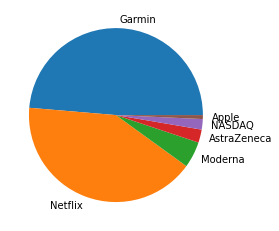

In [10]:
# jest brzydki, wiem
labels = list(pie_data.index.values)
plt.pie(pie_data, labels=labels)
plt.show()

### podział na sektory

In [24]:
# nad tym siedziałam długo XD
sektory = pie_data.to_frame().join(companies.set_index('firma'))
sektory

,balans,sektor,kurs,oplata
nazwa,,,,
Garmin,200.0,elektroniczny,1.27,1.75
Netflix,170.0,rozrywkowy,6.99,1.75
Moderna,20.0,medyczny,21.53,1.75
AstraZeneca,10.0,medyczny,21.54,1.75
NASDAQ,8.0,ekonomiczny,146.89,1.75
Apple,3.0,elektroniczny,362.48,1.75


In [12]:
pie_data2 = sektory.groupby(by=['sektor']).sum()
pie_data2 = pie_data2['balans'].sort_values(ascending=False)
pie_data2

sektor
elektroniczny    203.0
rozrywkowy       170.0
medyczny          30.0
ekonomiczny        8.0
Name: balans, dtype: float64

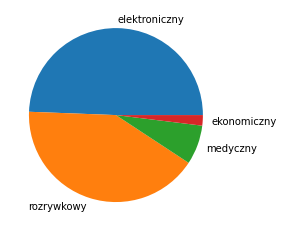

In [13]:
labels = list(pie_data2.index.values)
plt.pie(pie_data2, labels=labels)
plt.show()

In [14]:
sektory.sort_values(by='sektor')

,balans,sektor,kurs
nazwa,,,
NASDAQ,8.0,ekonomiczny,146.89
Garmin,200.0,elektroniczny,1.27
Apple,3.0,elektroniczny,362.48
Moderna,20.0,medyczny,21.53
AstraZeneca,10.0,medyczny,21.54
Netflix,170.0,rozrywkowy,6.99


In [15]:
# zbieram w grupy dane do wykresu zagnieżdżonego
nested_data_out = sektory.sort_values(by='sektor').groupby(by=['sektor']).sum()['balans']
labels_out = sektory.sort_values(by='sektor').groupby(by=['sektor']).sum().index.values
nested_data_in = sektory.sort_values(by='sektor')['balans']
labels_in = sektory.sort_values(by='sektor').index.values

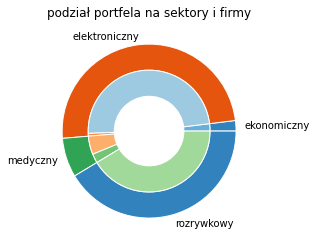

In [16]:
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(nested_data_out, radius=1, colors=outer_colors, startangle=0, normalize=True,
       labels=labels_out, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(nested_data_in, radius=1-size, colors=inner_colors, startangle=0, normalize=True,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='podział portfela na sektory i firmy')
plt.show()

([<matplotlib.patches.Wedge at 0x1ee47e047c0>,
 [Text(0.76856079896566, 0.047056331064654414, ''),
  Text(-0.06173363279498336, 0.7675213082266408, ''),
  Text(-0.7685607968316329, -0.04705636591924043, ''),
  Text(-0.7484837114981615, -0.18075434606652446, ''),
  Text(-0.6878033652827039, -0.3461596896026273, ''),
  Text(0.20638794120188242, -0.7418247891021493, '')])

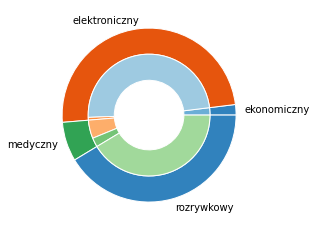

In [74]:
current_portfolio.sort_values(by='sektor', inplace=True)
current_portfolio

nested_data_out = current_portfolio.groupby(by=['sektor']).sum()['balans']
labels_out = nested_data_out.index.values
nested_data_in = current_portfolio['balans']
# labels_in = current_portfolio.index.values

fig, ax = plt.subplots()
size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(nested_data_out, radius=1, colors=outer_colors, startangle=0, normalize=True,
       labels=labels_out, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(nested_data_in, radius=1-size, colors=inner_colors, startangle=0, normalize=True,
       wedgeprops=dict(width=size, edgecolor='w'))

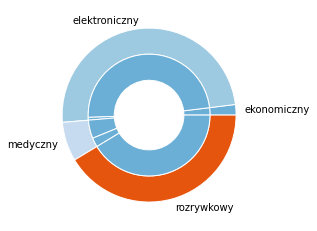

In [78]:
# funkcja przyjmująca 

def sectors_pie(current_portfolio):
    current_portfolio.sort_values(by='sektor', inplace=True)
    nested_data_out = current_portfolio.groupby(by=['sektor']).sum()['balans']
    labels_out = nested_data_out.index.values
    nested_data_in = current_portfolio['balans']
    
    fig, ax = plt.subplots()
    size = 0.3
    cmap = plt.get_cmap("tab20c")
#     outer_colors = cmap(np.arange(3)*4)
    outer_colors = cmap([1, 2, 3, 4, 5, 6, 9, 10])
    inner_colors = cmap([1])

    ax.pie(nested_data_out, radius=1, colors=outer_colors, startangle=0, normalize=True,
           labels=labels_out, wedgeprops=dict(width=size, edgecolor='w'))
    ax.pie(nested_data_in, radius=1-size, colors=inner_colors, startangle=0, normalize=True,
           wedgeprops=dict(width=size, edgecolor='w'))
    return ax.pie
    
pie = sectors_pie(current_portfolio)

# FUNKCJE
#### gotowe do wrzucenia w kod

In [17]:
# funkcja przyjmująca ścieżkę do pliku csv, zwracająca tabelę z tego pliku

def load_csv(path):
    df = pd.read_csv(path, sep=';')
    df.dropna(axis=1, inplace=True)
    df['kurs'] = df['kurs'].str.replace('$', '')
    df['kurs'] = [x.replace(',', '.') for x in df['kurs']]
    df['kurs'] = df['kurs'].astype(float)
    df['oplata'] = df['oplata'].str.replace('$', '')
    df['oplata'] = [x.replace(',', '.') for x in df['oplata']]
    df['oplata'] = df['oplata'].astype(float)
    return df

path = 'przykładowe_dane.csv'
test_df = load_csv(path)
test_df

,nazwa,kup/sprz,data,godzina,liczba akcji,kurs,oplata
0,Adobe,K,01.01.1999,15:31:43,20,26.51,1.75
1,Makita,K,02.02.1999,15:35:37,120,2.89,1.75
2,21 st Century Fox,K,02.02.1999,15:35:59,5,125.30,1.75
3,Starbucks,K,04.04.1999,15:47:20,30,42.20,1.75
4,Makita,S,05.06.1999,19:34:17,100,13.46,1.75
5,Facebook,K,06.07.1999,21:13:42,2,350.00,1.75
6,Adobe,K,06.07.1999,21:56:36,10,21.13,1.75
7,BlackBerry,K,06.11.1999,21:59:12,10,5.20,1.75
8,BlackBerry,S,06.11.1999,21:59:48,10,5.38,1.75
9,Makita,S,31.12.1999,20:28:28,20,3.02,1.75


In [19]:
# funkcja przyjmująca tabelę z transakcjami (czyli tą główną) i zwracająca tabelę z liczbą aktualnie posiadanych akcji

def count_shares_held(df):
    kupione_akcje = df[df['kup/sprz']=='K'].groupby(['nazwa']).sum()['liczba akcji']
    sprzedane_akcje = df[df['kup/sprz']=='S'].groupby(['nazwa']).sum()['liczba akcji']
    portfel = pd.DataFrame(kupione_akcje)
    portfel.rename(columns={"liczba akcji": "kupione"}, inplace=True)
    portfel['sprzedane'] = sprzedane_akcje
    portfel.fillna(0, inplace=True)
    portfel['balans'] = portfel['kupione'] - portfel['sprzedane']
    return portfel['balans'][portfel['balans'] > 0].sort_values(ascending=False)

shares_held = count_shares_held(test_df)
shares_held

nazwa
Garmin         200.0
Netflix        170.0
Moderna         20.0
AstraZeneca     10.0
NASDAQ           8.0
Apple            3.0
Name: balans, dtype: float64

In [25]:
# funkcja przyjmująca tabelę z liczbą aktualnie posiadanych akcji oraz tabelę z sektorami i obecnymi kursami,
# zwracająca połączoną tabelę podsumowującą portfolio

def portfolio_summary(shares_held, companies):
    return shares_held.to_frame().join(companies.set_index('firma'))

current_portfolio = portfolio_summary(shares_held, companies)
current_portfolio

,balans,sektor,kurs,oplata
nazwa,,,,
Garmin,200.0,elektroniczny,1.27,1.75
Netflix,170.0,rozrywkowy,6.99,1.75
Moderna,20.0,medyczny,21.53,1.75
AstraZeneca,10.0,medyczny,21.54,1.75
NASDAQ,8.0,ekonomiczny,146.89,1.75
Apple,3.0,elektroniczny,362.48,1.75


In [ ]:
# funkcja pomocnicza
def transaction_val(row):
    if row['kup/sprz'] == 'K':
        return row['liczba akcji']*row['kurs']+row['oplata']
    elif row['kup/sprz'] == 'S':
        return -1*(row['liczba akcji']*row['kurs'])+row['oplata']

In [18]:
# funkcja przyjmująca  tabelę z transakcjami (czyli tą główną) i zwracająca liczbę - ile do tej pory wydano pieniędzy na giełdzie

def count_money_spent(df):
    all_trans_val = df.apply(transaction_val, axis=1).sum()
    return all_trans_val

money_spent = count_money_spent(test_df)
money_spent

2292.82

In [32]:
# funkcja pomocnicza
def count_profit(row):
    return row['balans']*row['kurs']-row['oplata']

In [35]:
# funkcja przyjmująca tabelę podsumowującą portfolio, zwracająca jaka jest wartość akcji przy obecnych kursach
# (czyli ile by się zarobiło gdyby teraz je wszystkie sprzedać)

def count_all_profit(current_portfolio):
    possible_profit = current_portfolio.apply(count_profit, axis=1).sum()
    return possible_profit

profit = count_all_profit(current_portfolio)
profit

4340.360000000001

In [37]:
# funkcja licząca ile warte jest obecnie portfolio (przyjmuje 2 liczby - wydane do tej pory pieniądze i wartość akcji przy obecnych kursach)

def count_portfolio_value(money_spent, profit):
    return profit-money_spent

count_portfolio_value(money_spent, profit)

2047.5400000000004